In [1]:
#1. Activation
def sigmoid(x): 
    return 1/(1+np.exp(-x))

def relu(x):
    return np.where(x<=0,0,x)

def softmax(x): #원래 행렬의 모양대로 출력시키기 위해 한값(소프트맥스)만 곱함
    x = x - np.max(x,axis=1).reshape(-1,1)
    return np.exp(x)/np.sum(np.exp(x),axis=1).reshape(-1,1)

In [2]:
# 2. Loss function
def cross_entropy_error(y,t):
    delta = 1e-5
    return -np.sum(t*np.log(y+delta))/y.shape[0]

In [3]:
#3 differ function
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x)
    if x.ndim == 2:
        for i in range(x.shape[0]):
            for j in range(x.shape[1]):
                fx = f(x[i,j])
                tmp_val = x[i,j]
                x[i,j] = tmp_val + h
                fxh = f(x[i,j])
                grad[i,j] = (fxh - fx)/h
                x[i,j] = tmp_val
    else:
        for i in range(x.size):
            fx = f(x[i])
            tmp_val = x[i]
            x[i] = tmp_val + h
            fxh = f(x[i])
            grad[i] = (fxh - fx)/h
            x[i] = tmp_val
    return grad

In [4]:
def predict(x,w):
    return softmax(np.dot(x,w))

In [5]:
# 3. class
class OneLayer:
    def __init__(self,input_size,output_size):
        self.W = {}
        self.W['W1'] = np.random.randn(input_size,output_size)
        self.W['b'] = np.random.randn(output_size)
    
    def predict(self,x):
        W1, b = self.W['W1'], self.W['b']
        pred = softmax(np.dot(x,W1) + b)
        return pred
    
    def loss(self,x,t):
        y = self.predict(x)
        return cross_entropy_error(y,t)
    
    def numerical_gradient(self,x,t):
        y = self.predict(x)
        f = lambda W: cross_entropy_error(y,t)
        grad = {}
        grad['W1'] = numerical_gradient(f,self.W['W1'])
        grad['b'] = numerical_gradient(f, self.W['b'])
        
        return grad
    
    def accuracy(self,x,t):
        y = self.predict(x)
        acc = np.sum(np.argmax(y,axis=1) == np.argmax(t,axis=1))/y.shape[0]
        return acc
    
    def fit(self,x,t,epochs=1000,lr=1e-3,verbos=1):
        for epoch in range(epochs):
            self.W['W1'] = self.W['W1'] - lr*self.numerical_gradient(x,t)['W1']
            self.W['b'] -= lr*self.numerical_gradient(x,t)['b']
            if verbos == 1:
                print("=========== loss ",self.loss(x,t), "======== acc ",self.accuracy(x,t))

In [6]:
# 일차원 학습
import numpy as np
from sklearn.datasets import load_wine
X = load_wine()['data']
y = load_wine()['target']
t = np.zeros((y.size,np.unique(y).size))

input_size = X.shape[1]
output_size = t.shape[1]
model = OneLayer(input_size=input_size, output_size=output_size)

model.fit(X,t,verbos=2)

In [7]:
class TwoLayerNet: 
    def __init__(self,input_size,hidden_size,output_size):
        self.W = {}
        self.W['W1'] = np.random.randn(input_size,hidden_size)
        self.W['b1'] = np.random.randn(hidden_size)
        self.W['W2'] = np.random.randn(hidden_size,output_size)
        self.W['b2'] = np.random.randn(output_size)
        self.loss_val = []
    
    def predict(self,x):
        W1 = self.W['W1']
        W2 = self.W['W2']
        b1 = self.W['b1']
        b2 = self.W['b2']
        
        a1 = np.dot(x,W1) + b1 # 출력값
        z1 = relu(a1)
        a2 = np.dot(z1,W2) + b2
        out = softmax(a2)
        return out
    
    def loss(self,x,t):
        y = self.predict(x)
        loss = cross_entropy_error(y,t)
        return loss

    def numerical_gradient(self,x,t):
        f = lambda W: self.loss(x,t)
        
        grad = {}
        grad['W1'] = numerical_gradient(f, self.W['W1'])
        grad['b1'] = numerical_gradient(f, self.W['b1'])
        grad['W2'] = numerical_gradient(f, self.W['W2'])
        grad['b2'] = numerical_gradient(f, self.W['b2'])
        
        return grad

    
    def accuracy(self,x,t):
        y = self.predict(x)
        y = np.argmax(y,axis=1)
        t = np.argmax(t,axis=1)
        acc = sum(y == t)/x.shape[0]
        return acc
    
    def train(self,epochs,lr,x,t):
        for epoch in range(epochs):
            grad = self.numerical_gradient(x,t)
            for key in grad.keys():
                self.W[key] -= lr*grad[key]
            self.loss_val.append(self.loss(x,t))

In [8]:
class ThreeLayerNet:
    def __init__(self,input_size,hidden_size1,hidden_size2,output_size):
        self.W = {}
        self.W['W1'] = np.random.randn(input_size,hidden_size1)
        self.W['b1'] = np.random.randn(hidden_size1)
        self.W['W2'] = np.random.randn(hidden_size1,hidden_size2)
        self.W['b2'] = np.random.randn(hidden_size2)
        self.W['W3'] = np.random.randn(hidden_size2,output_size)
        self.W['b3'] = np.random.randn(output_size)
        self.loss_val = []
    
    def predict(self,x):
        W1 = self.W['W1']
        W2 = self.W['W2']
        W3 = self.W['W3']
        b1 = self.W['b1']
        b2 = self.W['b2']
        b3 = self.W['b3']
        
        a1 = np.dot(x,W1) + b1 
        z1 = relu(a1)
        a2 = np.dot(z1,W2) + b2
        z2 = relu(a2)
        a3 = np.dot(z2,W3) + b3
        out = softmax(a3)
        return out
    
    def loss(self,x,t):
        y = self.predict(x)
        loss = cross_entropy_error(y,t)
        return loss

    def numerical_gradient(self,x,t):
        f = lambda W: self.loss(x,t)
        
        grad = {}
        grad['W1'] = numerical_gradient(f, self.W['W1'])
        grad['b1'] = numerical_gradient(f, self.W['b1'])
        grad['W2'] = numerical_gradient(f, self.W['W2'])
        grad['b2'] = numerical_gradient(f, self.W['b2'])
        grad['W3'] = numerical_gradient(f, self.W['W3'])
        grad['b3'] = numerical_gradient(f, self.W['b3'])
        
        return grad

    
    def accuracy(self,x,t):
        y = self.predict(x)
        y = np.argmax(y,axis=1)
        t = np.argmax(t,axis=1)
        acc = sum(y == t)/x.shape[0]
        return acc
    
    def fit(self,epochs,lr,x,t):
        for epoch in range(epochs):
            grad = self.numerical_gradient(x,t)
            for key in grad.keys():
                self.W[key] -= lr*grad[key]
            self.loss_val.append(self.loss(x,t))

In [9]:
def make_one(x):
    if x.ndim == 2:
        x = np.ravel(x.values)
    t = np.zeros((x.size,np.unique(x).size))
    for i in range(t.shape[0]):
        t[i,x[i]] = 1
    return t

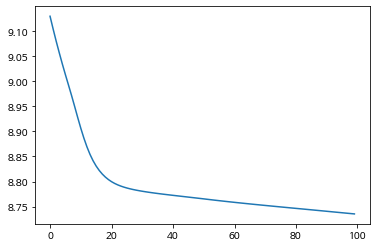

In [10]:
#3차원 학습
from sklearn.datasets import load_digits

X = load_digits()['data']
y = load_digits()['target']
t = make_one(y)

input_size = X.shape[1]
output_size = t.shape[1]
hidden_size1 = 10
hidden_size2 = 5

model = ThreeLayerNet(input_size,hidden_size1,hidden_size2,output_size)
model.fit(100,1e-3,X,t)

import matplotlib.pyplot as plt
plt.plot(np.arange(len(model.loss_val)),model.loss_val)

In [11]:
#다차원 학습
class MultiLayerNet:
    def __init__(self,input_size,hidden_size,output_size):
        hidden_size.append(output_size)
        self.W = {}
        self.W = {}
        self.W['Input'] = np.random.randn(input_size,hidden_size[0])
        self.W['Input_b'] = np.random.randn(hidden_size[0])
        for i in range(len(hidden_size)-1):
            w = 'W'+str(i)
            b = 'b'+str(i)
            self.W[w] = np.random.randn(hidden_size[i],hidden_size[i+1])
            self.W[b] = np.random.randn(hidden_size[i+1])      
    
    def predict(self,x):
        j = 0
        for i in range(len(self.W)):
            if j % 2 == 0 and i < (len(self.W)-1):
                x = relu(np.dot(x,self.W[list(self.W.keys())[i]]) + self.W[list(self.W.keys())[i+1]])
            elif j % 2 == 0 and i >= (len(self.W)-1):
                x = (np.dot(x,self.W[list(self.W.keys())[i]]) + self.W[list(self.W.keys())[i+1]])
            j += 1
        return softmax(x)
    
    def loss(self,x,t):
        y = self.predict(x)
        return cross_entropy_error(y,t)
    
    def numerical_gradient(self,x,t):
        f = lambda W: self.loss(x,t)
        grads = {}
        for key in self.W.keys():
            grads[key] = numerical_gradient(f,self.W[key])
        return grads
    
    def accuracy(self,x,t):
        y = np.argmax(self.predict(x),axis=1)
        t = np.argmax(t, axis=1)
        acc = np.sum(y==t)/y.size
        return acc
    
    def fit(self,epochs,lr,x,t,verbos=1):
        for epoch in range(epochs):
            for key in self.W.keys():
                self.W[key] -= lr*self.numerical_gradient(x,t)[key]
            if verbos == 1:
                print(epoch,":epoch============== accuracy: ",self.accuracy(x,t),"==========loss :", self.loss(x,t))